**Análise dos dados da Google Play Store**

**Objetivo**

Os dados dos aplicativos da Play Store têm um enorme potencial para levar as empresas que desenvolvem essas aplicações ao sucesso.O objetivo deste projeto é analisar esses dados com o intuito de ajudar os desenvolvedores a entender que tipo de aplicativo provavelmente atrairá mais usuários.


**Obtenção dos Dados**

Os dados usados nessa análise são referentes ao ano de 2018 e foram obtidos a partir do site [Kaggle.com](https://www.kaggle.com/lava18/google-play-store-apps)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
dados = pd.read_csv('googleplaystore.csv')

**Dicionário das variáveis**

* App - Nome do aplicativo
* Category - Categoria à qual o aplicativo pertence
* Rating - classificação do aplicativo 
* Reviews - Número de avaliações de usuários do aplicativo
* Size - Tamanho do aplicativo
* Installs - Número de downloads / instalações de usuário para o aplicativo 
* Type - Pago ou Gratuito
* Price - preço
* Content Rating - Faixa etária em que o aplicativo é direcionado - Crianças / maiores de 21 anos / Adulto
* Genres - Um aplicativo pode pertencer a vários gêneros (além da categoria principal). Por exemplo, um jogo musical familiar pertence aos gêneros Música, Jogo, Família.
* Last Updated - Data em que o aplicativo foi atualizado pela última vez na Play Store
* Current Ver - Versão atual do aplicativo disponível na Play Store
* Android Ver - Versão mínima exigida do Android

In [3]:
# Primeiras 5 linhas:
dados.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Quantos linhas e quantas colunas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# Tamanho do Dataframe:
print(f'Número de linhas: {len(dados.index)}')
print(f'Número de colunas: {len(dados.columns)}\n')

# Identificando o tipo de cada variável:
display(dados.dtypes)

Número de linhas: 10841
Número de colunas: 13



App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

**Limpeza e transformação dos dados**

In [6]:
# Corrigindo o nome das colunas:
dados.columns = dados.columns.str.replace(' ', '_')

# Visualizando os dados novamente:
dados.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# Identificando registro:
dados[~dados.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
# Removendo o registro:
dados.drop(dados.index[10472], inplace=True)

In [10]:
# Convertendo o tipo dos dados:
dados.Reviews = pd.to_numeric(dados.Reviews)

In [11]:
# Removendo os aplicativos duplicados:
dados = dados.sort_values(by='Reviews', ascending=False).drop_duplicates('App', keep='first')

# Reorganizando os indices:
dados = dados.reset_index(drop=True)

In [12]:
dados.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
1,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
4,Clash of Clans,GAME,4.6,44893888,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


*Size*

In [14]:
# Valores únicos:
display(dados.Size.unique())

array(['Varies with device', '98M', '76M', '97M', '74M', '40M', '52M',
       '14M', '15M', '88M', '24M', '85M', '94M', '99M', '63M', '92M',
       '17M', '62M', '71M', '34M', '95M', '67M', '58M', '100M', '59M',
       '53M', '96M', '16M', '26M', '41M', '9.9M', '51M', '32M', '11M',
       '55M', '60M', '79M', '69M', '42M', '77M', '57M', '82M', '75M',
       '36M', '3.3M', '68M', '22M', '7.6M', '50M', '33M', '7.4M', '89M',
       '18M', '25M', '78M', '46M', '49M', '9.7M', '37M', '72M', '39M',
       '87M', '6.1M', '5.1M', '70M', '28M', '29M', '61M', '7.1M', '48M',
       '21M', '35M', '54M', '12M', '56M', '3.8M', '8.7M', '91M', '27M',
       '45M', '66M', '31M', '4.7M', '8.2M', '43M', '13M', '47M', '20M',
       '80M', '6.6M', '3.1M', '6.5M', '9.1M', '30M', '7.9M', '4.2M',
       '44M', '4.4M', '93M', '8.9M', '83M', '3.5M', '73M', '90M', '9.8M',
       '19M', '9.2M', '64M', '1.5M', '5.2M', '23M', '5.3M', '2.5M', '10M',
       '2.7M', '2.1M', '86M', '4.9M', '2.9M', '9.0M', '8.4M', '7.3M'

In [15]:
# Limpeza da coluna:
dados.Size = dados.Size.map(lambda x: str (round ((float (x.rstrip ('k')) / 1024), 1)) if x [-1] == 'k' else x) 
dados.Size = dados.Size.map(lambda x: x.rstrip ('M'))
dados.Size = dados.Size.map(lambda x: np.nan if x.startswith ('Varies') else x) 
dados.Size = dados.Size.astype(float)

In [16]:
# Preenchendo os registros nulos:
dados.Size.fillna(dados.groupby('Category')['Size'].transform('mean'),inplace = True)

*Installs*


In [15]:
dados.Installs.value_counts()

1,000,000+        1417
100,000+          1113
10,000+           1030
10,000,000+        937
1,000+             887
100+               709
5,000,000+         607
500,000+           504
50,000+            469
5,000+             468
10+                385
500+               328
50,000,000+        204
50+                204
100,000,000+       189
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

Os dados de instalação parecem imprecisos, com valores indicados em faixas amplas (100+, 1.000+, 5.000+ etc.). Não é claro se um app com mais de 100.000 instalações tem exatamente 100.000 ou um número diferente, como 200.000 ou 350.000. Contudo, para nossa análise sobre os gêneros de aplicativos mais atrativos, a precisão exata dos números de usuários não é essencial.

Decidimos manter os números como apresentados, interpretando que um app com mais de 100.000 instalações tem 100.000 e um com mais de 1.000.000 tem 1.000.000, e assim por diante. Para realizar cálculos precisos, precisaremos converter cada valor de instalação, atualmente em formato de string, em números. Isso implica remover vírgulas e outros caracteres, evitando possíveis erros na conversão.

In [16]:
# Limpando os dados e convertendo os valores:
dados.Installs = dados.Installs.apply(lambda x: x.strip('+'))
dados.Installs= dados.Installs.apply(lambda x: x.replace(',',''))
dados.Installs = pd.to_numeric(dados.Installs)
dados.Installs.value_counts()

1000000       1417
100000        1113
10000         1030
10000000       937
1000           887
100            709
5000000        607
500000         504
50000          469
5000           468
10             385
500            328
50000000       204
50             204
100000000      189
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

*Price*

In [17]:
# Valores únicos da coluna "Price"
dados.Price.unique()

array(['0', '$6.99', '$0.99', '$2.99', '$1.99', '$2.49', '$4.99', '$5.99',
       '$4.49', '$9.99', '$3.99', '$1.49', '$3.95', '$7.99', '$3.49',
       '$8.99', '$13.99', '$19.99', '$11.99', '$12.99', '$2.90', '$17.99',
       '$399.99', '$29.99', '$14.99', '$2.95', '$4.77', '$24.99', '$3.90',
       '$2.50', '$3.28', '$1.20', '$2.59', '$9.00', '$1.59', '$1.00',
       '$5.49', '$18.99', '$299.99', '$1.97', '$400.00', '$16.99',
       '$389.99', '$33.99', '$10.00', '$10.99', '$4.84', '$37.99',
       '$1.61', '$8.49', '$4.60', '$79.99', '$4.29', '$1.70', '$1.50',
       '$1.29', '$19.40', '$3.08', '$379.99', '$2.56', '$15.46', '$7.49',
       '$4.59', '$2.00', '$14.00', '$6.49', '$15.99', '$74.99', '$3.88',
       '$3.02', '$39.99', '$89.99', '$5.00', '$1.75', '$1.26', '$2.60',
       '$19.90', '$4.80', '$1.76', '$46.99', '$3.04', '$4.85', '$30.99',
       '$3.61', '$154.99', '$394.99', '$109.99', '$1.96', '$1.04',
       '$28.99', '$25.99', '$200.00'], dtype=object)

O preço está no formato de "string". Primeiro precisamos remover o cifrão   para depois convertê-lo em formato numérico.

In [ ]:
# Removendo o símbolo monetário e transformando o tipo de dado:
dados.Price=dados.Price.apply(lambda x: x.replace('$','') if '$' in str(x) else x)
dados.Price = pd.to_numeric(dados.Price)

*Content_Rating*

In [19]:
# Valores únicos da coluna:
dados.Content_Rating.unique()

array(['Teen', 'Everyone', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

**'Unrated'** quer dizer sem classificação, não foi informado para que tipo de público esse app foi disponibilizado, vamos identificar quais são esses aplicativos:-

In [20]:
# Identificando os aplicativos:
dados.loc[(dados.Content_Rating == "Unrated")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4714,DC Universe Online Map,TOOLS,4.1,1186,6.4,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up
8977,Best CG Photography,FAMILY,NaN,1,2.5,500,Free,0.0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up


Vamos remover essas duas linhas

In [ ]:
# Removendo as linhas:
dados.drop(dados.index[[4714,8977]], inplace=True)

*Genres*

In [22]:
dados.Genres.unique()

array(['Social', 'Communication', 'Strategy', 'Tools', 'Arcade',
       'Video Players & Editors', 'Casual', 'Sports', 'News & Magazines',
       'Action', 'Photography', 'Adventure', 'Casual;Action & Adventure',
       'Travel & Local', 'Racing', 'Personalization', 'Maps & Navigation',
       'Entertainment', 'Trivia', 'Education;Education', 'Shopping',
       'Productivity', 'Health & Fitness', 'Adventure;Action & Adventure',
       'Simulation', 'Books & Reference', 'Lifestyle', 'Role Playing',
       'Arcade;Action & Adventure', 'Weather', 'Puzzle', 'Casino', 'Card',
       'Word', 'Puzzle;Action & Adventure', 'Sports;Action & Adventure',
       'Board', 'Finance', 'Puzzle;Brain Games',
       'Racing;Action & Adventure', 'Business', 'Education',
       'Food & Drink', 'Educational;Pretend Play', 'Comics',
       'Card;Action & Adventure', 'Music',
       'Educational;Action & Adventure', 'Parenting',
       'Simulation;Action & Adventure', 'Role Playing;Action & Adventure',
      


Os dados estão no formato Categoria; Subcategoria. Vamos dividi-los e extrair apenas a categoria principal. 

In [23]:
# Extraindo a categoria principal:
dados.Genres = dados.Genres.str.split(';').str[0]
dados.Genres.unique()

array(['Social', 'Communication', 'Strategy', 'Tools', 'Arcade',
       'Video Players & Editors', 'Casual', 'Sports', 'News & Magazines',
       'Action', 'Photography', 'Adventure', 'Travel & Local', 'Racing',
       'Personalization', 'Maps & Navigation', 'Entertainment', 'Trivia',
       'Education', 'Shopping', 'Productivity', 'Health & Fitness',
       'Simulation', 'Books & Reference', 'Lifestyle', 'Role Playing',
       'Weather', 'Puzzle', 'Casino', 'Card', 'Word', 'Board', 'Finance',
       'Business', 'Food & Drink', 'Educational', 'Comics', 'Music',
       'Parenting', 'Dating', 'House & Home', 'Libraries & Demo',
       'Art & Design', 'Auto & Vehicles', 'Medical', 'Beauty', 'Events',
       'Music & Audio'], dtype=object)

Observe que entre as categorias temos "Music & Audio" e "Music", que na verdade são a mesma coisa, vamos corrigir isso.

In [24]:
# Corrigindo o nome da categoria.
dados.Genres.replace(['Music & Audio'], 'Music',inplace =True)
dados.Genres.unique()

array(['Social', 'Communication', 'Strategy', 'Tools', 'Arcade',
       'Video Players & Editors', 'Casual', 'Sports', 'News & Magazines',
       'Action', 'Photography', 'Adventure', 'Travel & Local', 'Racing',
       'Personalization', 'Maps & Navigation', 'Entertainment', 'Trivia',
       'Education', 'Shopping', 'Productivity', 'Health & Fitness',
       'Simulation', 'Books & Reference', 'Lifestyle', 'Role Playing',
       'Weather', 'Puzzle', 'Casino', 'Card', 'Word', 'Board', 'Finance',
       'Business', 'Food & Drink', 'Educational', 'Comics', 'Music',
       'Parenting', 'Dating', 'House & Home', 'Libraries & Demo',
       'Art & Design', 'Auto & Vehicles', 'Medical', 'Beauty', 'Events'],
      dtype=object)

*Last_Update*

Vamos alterar o formato dos dados nessa coluna de string para data. Em seguida, vamos gerar uma nova coluna chamada "Last_Updated_Days", que mostrará a diferença entre a data da última atualização e o dia atual. Isso nos permitirá analisar há quantos dias o aplicativo foi atualizado.


In [ ]:
# Convertendo a data de string para date.
from datetime import datetime,date
temp = pd.to_datetime(dados.Last_Updated)

In [26]:
# Criando a nova coluna:
dados['Last_Updated_Days'] = temp.apply(lambda x:date.today()-datetime.date(x))
dados.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Last_Updated_Days
0,Facebook,SOCIAL,4.1,78158306,15.983598,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,585 days
1,WhatsApp Messenger,COMMUNICATION,4.4,69119316,11.306198,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,585 days
2,Instagram,SOCIAL,4.5,66577446,15.983598,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,588 days
3,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,11.306198,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,587 days
4,Clash of Clans,GAME,4.6,44893888,98.000000,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,604 days


*Android_Ver*

In [27]:
dados.Android_Ver.unique()

array(['Varies with device', '4.1 and up', '4.0 and up', '4.0.3 and up',
       '3.0 and up', '4.4 and up', '4.2 and up', '2.3 and up',
       '4.3 and up', '5.0 and up', '2.3.3 and up', '2.1 and up',
       '3.1 and up', '2.0.1 and up', '2.0 and up', '4.1 - 7.1.1',
       '2.2 and up', '6.0 and up', '5.0 - 8.0', '1.5 and up',
       '4.0.3 - 7.1.1', '1.6 and up', '7.1 and up', '7.0 and up',
       '3.2 and up', '5.1 and up', '8.0 and up', '5.0 - 6.0',
       '1.0 and up', '4.4W and up', nan, '7.0 - 7.1.1', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

A maioria dos valores tem um valor inferior e um valor superior (ou seja, um intervalo), mas o que nos interessa é saber a versão miníma que um dispositivo deve ter para que esse aplicativo funcione.

In [ ]:
# Extraindo a versão miníma:
dados.Android_Ver = dados.Android_Ver.apply(lambda x:str(x).split(' and ')[0].split(' - ')[0])
dados.Android_Ver = dados.Android_Ver.replace('4.4W','4.4')

In [29]:
dados.Android_Ver.unique()

array(['Varies with device', '4.1', '4.0', '4.0.3', '3.0', '4.4', '4.2',
       '2.3', '4.3', '5.0', '2.3.3', '2.1', '3.1', '2.0.1', '2.0', '2.2',
       '6.0', '1.5', '1.6', '7.1', '7.0', '3.2', '5.1', '8.0', '1.0',
       'nan'], dtype=object)

A coluna "Current_ver" não será usada em nossa análise.

In [ ]:
# Dropando as colunas irrelevantes:
def remove_features(lista_features):
    ''' Função que remove as colunas irrelevantes '''
    for i in lista_features:
        dados.drop(i,axis=1,inplace=True)
remove_features(['Current_Ver'])

**Qual a porcentagem de valores ausentes no dataset?**

Vamos analisar se a quantidade de valores nulos são siginificativos comparados ao total de entradas.


In [ ]:
# Visualizando os valores faltantes:
def missing_value(dataset):
  ''' Função que mostra a porcentagem e o total de valores faltantes de cada coluna, ordenando do maior para o menor '''
  total = dataset.isnull().sum().sort_values(ascending=False)
  percent = dataset.isnull().sum()/dataset.isnull().count().sort_values(ascending=False)
  missing_data = pd.concat([total, percent], axis=1, sort=False, keys=['total', 'percent'])
  missing_data[missing_data['percent']!=0]
  return missing_data

In [32]:
missing_value(dados)

,total,percent
Rating,1462,0.151393
Type,1,0.000104
Last_Updated_Days,0,0.000000
Android_Ver,0,0.000000
Last_Updated,0,0.000000
Genres,0,0.000000
Content_Rating,0,0.000000
Price,0,0.000000
Installs,0,0.000000
Size,0,0.000000


A coluna "Rating" representa as avaliações dadas pelos usuários aos aplicativos. Cerca de 15% dos valores estão ausentes e é importante compreender como essa classificação é realizada.

## **O processo de avaliação**

Na Play Store, os usuários podem atribuir uma nota de avaliação na página de download do aplicativo, com ou sem um comentário. Não há uma coluna na base de dados para os comentários.

A avaliação não é obrigatória, mas é útil para motivar os desenvolvedores.

## **Como as avaliações são feitas**

Os usuários simplesmente clicam nas estrelas para indicar sua classificação:

## ★☆☆☆☆ – Avaliação muito fraca
Indica insatisfação com o aplicativo, possivelmente devido a muitos anúncios e problemas de desenvolvimento.

## ★★☆☆☆ – Avaliação fraca
Mesmo sendo uma avaliação negativa, pode haver apreciação por alguma funcionalidade específica do aplicativo.

## ★★★☆☆ – Avaliação razoável
Indica que o aplicativo atende à sua finalidade, mas necessita de melhorias em aspectos como design, por exemplo.

## ★★★★☆ – Avaliação boa
Um app com 4 estrelas já é considerado muito bom, cumprindo suas promessas e sendo bem desenvolvido.

## ★★★★★ – Avaliação ótima
Indica que o aplicativo é bem desenvolvido, possui ótimo design, navegação e suas funcionalidades são excelentes.









Depois que entendemos como essa avaliação é feita, vamos remover os valores faltantes, como eles não possuem uma classificação podemos concluir que esses aplicativos não são atraentes para os usuários.

A coluna "Type" só tem um valor faltante que também será removido.

In [ ]:
# Removendo os valores faltantes.
dados.dropna(axis = 0, how ='any', inplace = True)

In [34]:
# Verificando se os valores foram preenchidos corretamente
missing_value(dados)

,total,percent
Last_Updated_Days,0,0.0
Android_Ver,0,0.0
Last_Updated,0,0.0
Genres,0,0.0
Content_Rating,0,0.0
Price,0,0.0
Type,0,0.0
Installs,0,0.0
Size,0,0.0
Reviews,0,0.0


**Análise Exploratória dos Dados (EDA)**

**Quais são as categorias que tem o maior número de aplicativos?**

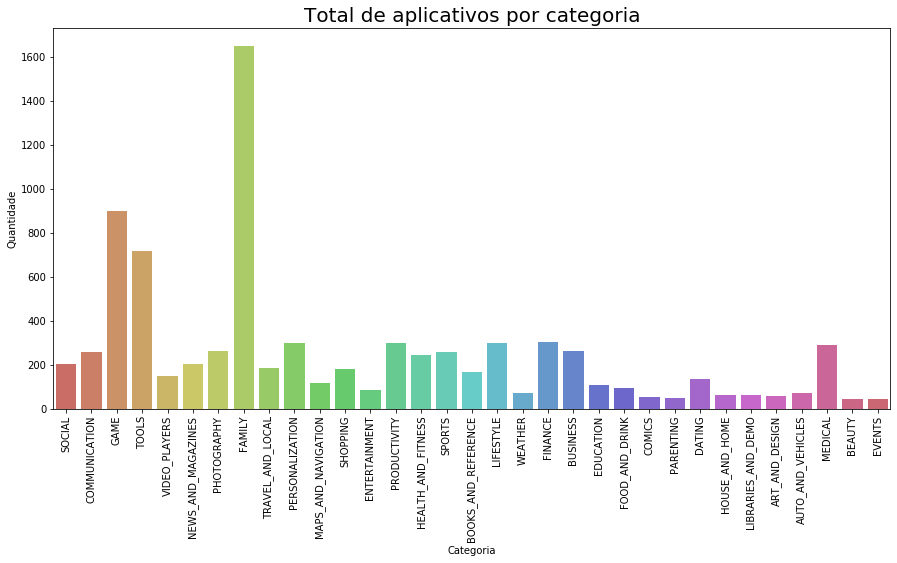

In [35]:
plt.figure(figsize=(15,7))
fig = sns.countplot(x=dados.Category, palette="hls")
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.title('Total de aplicativos por categoria', size=20)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

**Os aplicativos são direcionados para quais faixa etárias?**

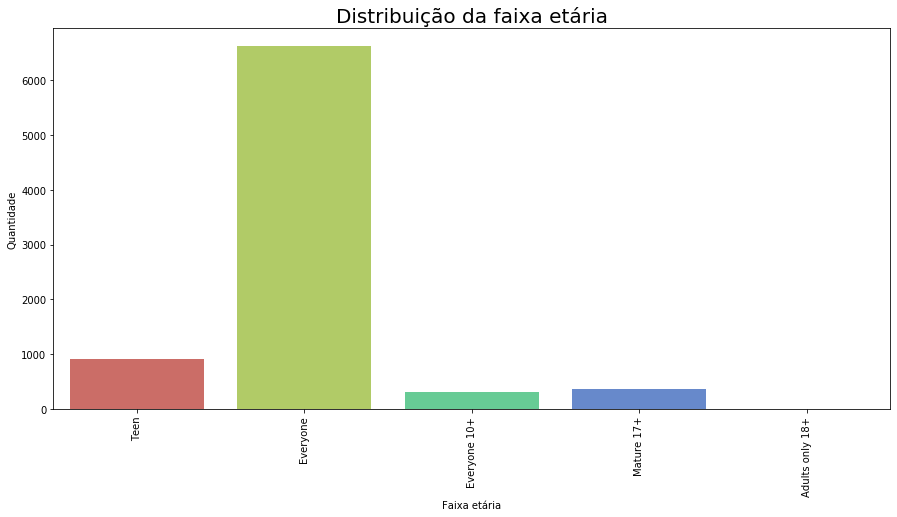

In [37]:
plt.figure(figsize=(15,7))
fig = sns.countplot(x=dados.Content_Rating, palette="hls")
plt.xlabel('Faixa etária')
plt.ylabel('Quantidade')
plt.title('Distribuição da faixa etária', size=20)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

A maioria dos aplicativos está disponível para todos os públicos.

**Qual o maior volume de downloads?**


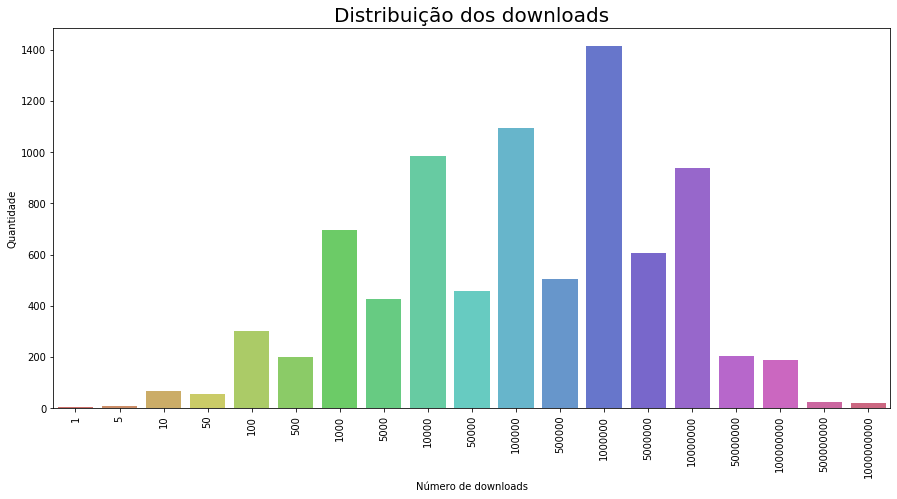

In [38]:
plt.figure(figsize=(15,7))
fig = sns.countplot(x=dados.Installs, palette="hls")
plt.xlabel('Número de downloads')
plt.ylabel('Quantidade')
plt.title('Distribuição dos downloads', size=20)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

Muitos aplicativos tiveram cerca de 1 milhão de downloads.

**Quais são os 15 aplicativos com o maior número de downloads?**

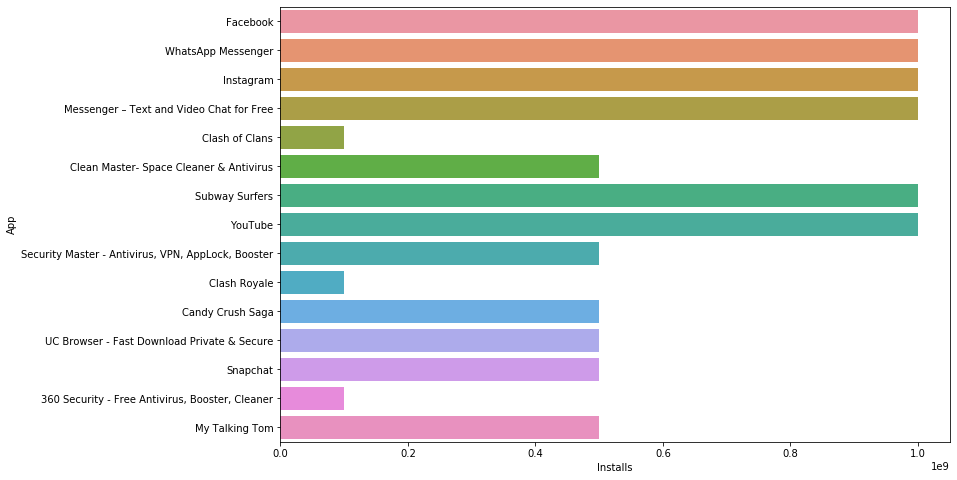

In [39]:
plt.figure(figsize=(12,8))
ax=sns.barplot(y='App',x='Installs',data=dados.head(15))
plt.show()

In [40]:
# Os 15 aplicativos com mais downloads:
dados.sort_values(by="Installs", ascending=False)[["App", "Installs", "Rating"]].head(15)

,App,Installs,Rating
0,Facebook,1000000000,4.1
22,Google Photos,1000000000,4.5
251,Google Play Books,1000000000,3.9
89,Google+,1000000000,4.2
93,Gmail,1000000000,4.3
1,WhatsApp Messenger,1000000000,4.4
188,Google Street View,1000000000,4.2
51,Google Play Games,1000000000,4.3
377,Google Play Movies & TV,1000000000,3.7
388,Google News,1000000000,3.9


**Quais são os 15 aplicativos com as maiores avaliações?**

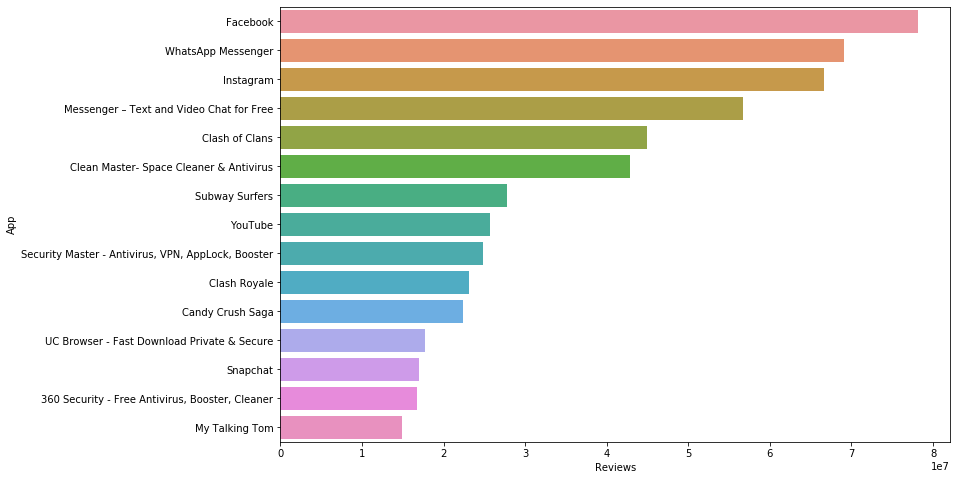

In [41]:
plt.figure(figsize=(12,8))
ax=sns.barplot(y='App',x='Reviews',data=dados.head(15))
plt.show()


In [42]:
# Os 15 aplicativos com mais avaliações:
dados.sort_values(by="Reviews", ascending=False)[["App", "Reviews", "Rating"]].head(15)

,App,Reviews,Rating
0,Facebook,78158306,4.1
1,WhatsApp Messenger,69119316,4.4
2,Instagram,66577446,4.5
3,Messenger – Text and Video Chat for Free,56646578,4.0
4,Clash of Clans,44893888,4.6
5,Clean Master- Space Cleaner & Antivirus,42916526,4.7
6,Subway Surfers,27725352,4.5
7,YouTube,25655305,4.3
8,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999,4.7
9,Clash Royale,23136735,4.6


As maiores avaliações são para os aplicativos de rede social, o campeão é o Facebook.

**A loja tem mais aplicativos pagos ou gratuitos?**

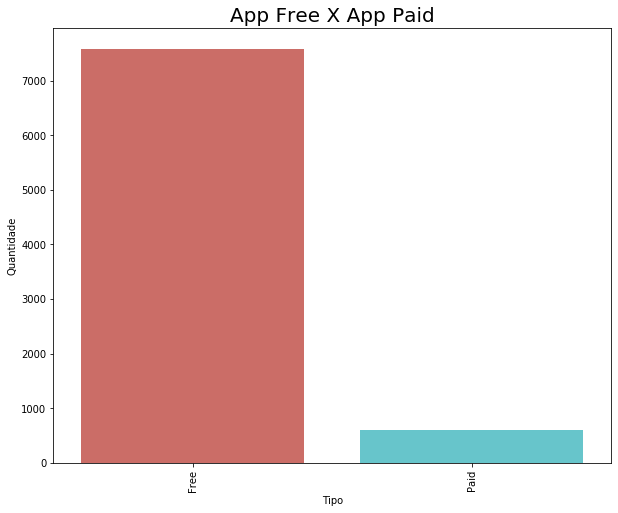

In [43]:
plt.figure(figsize=(10,8))
fig = sns.countplot(x=dados.Type,  palette="hls")
plt.xlabel('Tipo')
plt.ylabel('Quantidade')
plt.title('App Free X App Paid', size=20)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

A maioria dos aplicativos da Play Store são gratuitos.

**Entre os aplicativos pagos quais são os preços mais frequentes?**

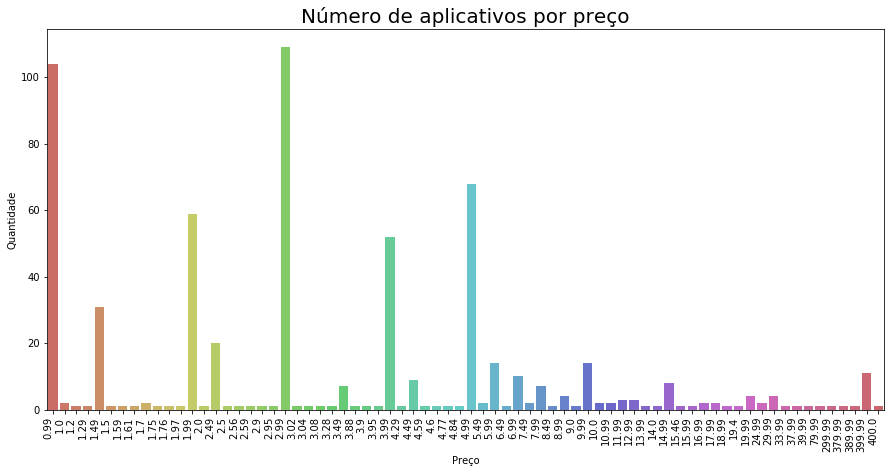

In [44]:
plt.figure(figsize=(15,7))
price_app = dados[dados.Price != 0.0]
price_plot = sns.countplot(price_app.Price, palette = "hls")
plt.xlabel('Preço')
plt.ylabel('Quantidade')
plt.title('Número de aplicativos por preço',size = 20)
price_plot.set_xticklabels(price_plot.get_xticklabels(), rotation=90, ha="right")
plt.show(fig)

Filtramos somente os aplicativos pagos para poder observar a sua distribuição. Há um número elevado de aplicativos que custam 0.99 e 3.02 dólares. 

**Quais são as classificações mais frequentes?**

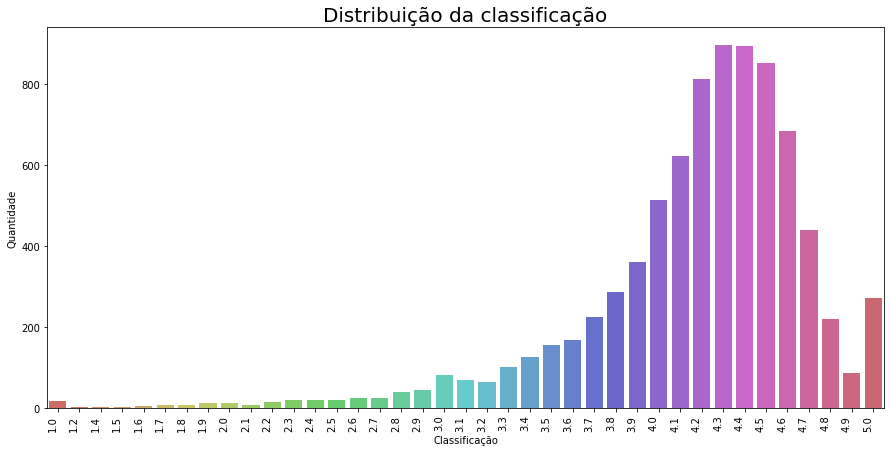

In [45]:
plt.figure(figsize=(15,7))
ratings = sns.countplot(x="Rating",data=dados, palette = "hls")
ratings.set_xticklabels(ratings.get_xticklabels(), rotation=90, ha="right")
plt.xlabel('Classificação')
plt.ylabel('Quantidade')
plt.title('Distribuição da classificação',size = 20)
plt.show(fig)

A distribuição da classificação está entre 4.0 e 4.7.

**Conclusão**

Depois de toda essa análise podemos concluir que os aplicativos voltados para rede social e games são os que mais atraem os usuários, então um desenvolvedor pode usar essa análise como base para criar seu próximo aplicativo.

